In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("denver_lat_long_rent.csv")
df.head()

,Neighborhood,Average Rent,Latitude,Longitude
0,Athmar Park,1469.0,39.70396,-105.01039
1,Baker,2028.0,39.71117,-104.99209
2,Barnum,1010.0,39.71816,-105.03262
3,Barnum West,1784.0,39.71815,-105.04510
4,Bear Valley,1526.0,39.66172,-105.06561


In [3]:
df.describe()

,Average Rent,Latitude,Longitude
count,74.000000,74.000000,74.000000
mean,1711.148649,39.714436,-105.010219
std,308.605777,0.101484,0.407569
min,1010.000000,38.932480,-108.416750
25%,1469.000000,39.691080,-105.017180
50%,1790.000000,39.725735,-104.970774
75%,1947.000000,39.755408,-104.931067
max,2245.000000,39.853520,-104.673770


In [4]:
#mms = MinMaxScaler()
#mms.fit(data)
#data_transformed = mms.transform(data)

In [5]:
#Sum_of_squared_distances = []
#K = range(1,7)
#for k in K:
#    km = KMeans(n_clusters=k)
#    km = km.fit(data_transformed)
#    Sum_of_squared_distances.append(km.inertia_)

In [6]:
#plt.plot(K, Sum_of_squared_distances, 'bx-')
#plt.xlabel('k')
#plt.ylabel('Sum_of_squared_distances')
#plt.title('Elbow Method For Optimal k')
#plt.show()

### Create a map of New York with neighborhoods superimposed on top.

In [7]:
import folium
import geocoder
from geopy.geocoders import Nominatim

In [8]:
address = 'Denver, CO'
geolocator = Nominatim(user_agent="denver_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Denver are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Denver are 39.7392364, -104.9848623.


In [9]:
# create map of Denver using latitude and longitude values
map_denver = folium.Map(location=[latitude, longitude], zoom_start=11.2)

# add markers to map
for lat, lng, neighborhood in zip(df['Latitude'], df['Longitude'], df['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_denver)
map_denver

As we did with all of Denver, let's visualizat Athmar Park neighborhoods in it.

In [10]:
address = 'Athmar Park, CO'

geolocator = Nominatim(user_agent="denver_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Athmar Park are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Athmar Park are 39.7036815, -105.01074128924687.


In [11]:
# create map of Athmar Park using latitude and longitude values
map_athmar_park = folium.Map(location=[latitude, longitude], zoom_start=13.5)

# add markers to map
for lat, lng, neighborhood in zip(df['Latitude'], df['Longitude'], df['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_denver)
map_athmar_park

Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.

#### Define Foursquare Credentials and Version

In [12]:
#Mine
#CLIENT_ID = 'DEZANQZIG1YYPFJHNUYIXRU101IGJLFRM2YRWS5Z4GENWWLK' # your Foursquare ID
#CLIENT_SECRET = 'ZIO4F1OEIQEJEWY0M1EC31BEPB2VPIFZ0TEHFSN5LBMEHM3C' # your Foursquare Secret
#VERSION = '20180605' # Foursquare API version
#print('Your credentails:')
#print('CLIENT_ID: ' + CLIENT_ID)
#print('CLIENT_SECRET:' + CLIENT_SECRET)

In [13]:
CLIENT_ID = 'ZYLC4Q3I000O4R32DVJWJJTOTHCGC4O02TXYEPLDAS211SPQ' # your Foursquare ID
CLIENT_SECRET = 'OPKHF1MTRWKRHVR2DAV0IT1IK2H2XZDXJYTCNHVY5L44T55H'  # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ZYLC4Q3I000O4R32DVJWJJTOTHCGC4O02TXYEPLDAS211SPQ
CLIENT_SECRET:OPKHF1MTRWKRHVR2DAV0IT1IK2H2XZDXJYTCNHVY5L44T55H


Now, let's get the top 100 venues that are in Athmar Park within a radius of 500 meters.

First, let's create the GET request URL. Name your URL url.

In [14]:
# type your answer here
#The correct answer is:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    df["Latitude"][0],
    df["Longitude"][0],
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=ZYLC4Q3I000O4R32DVJWJJTOTHCGC4O02TXYEPLDAS211SPQ&client_secret=OPKHF1MTRWKRHVR2DAV0IT1IK2H2XZDXJYTCNHVY5L44T55H&v=20180605&ll=39.703960000000045,-105.01038999999996&radius=500&limit=100'

Send the GET request and examine the resutls

In [15]:
import json
from pandas.io.json import json_normalize 
import requests

In [16]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f270b92f025076ada9a2fb0'},
 'response': {'headerLocation': 'Athmar Park',
  'headerFullLocation': 'Athmar Park, Denver',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 4,
  'suggestedBounds': {'ne': {'lat': 39.70846000450005,
    'lng': -105.0045518627113},
   'sw': {'lat': 39.69945999550004, 'lng': -105.01622813728862}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5715298a498eaa8b7b7644fe',
       'name': "Jeff's Hot Tub Getaway",
       'location': {'lat': 39.704167,
        'lng': -105.010751,
        'labeledLatLngs': [{'label': 'display',
          'lat': 39.704167,
          'lng': -105.010751}],
        'distance': 38,
        'cc': 'US',
        'city': 'Denver',
        'state': 'CO',
        'country':

From the Foursquare lab in the previous module, we know that all the information is in the *items* key. Before we proceed,
let's borrow the **get_category_type** function from the Foursquare lab.

In [17]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a pandas dataframe.

In [18]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Jeff's Hot Tub Getaway,Vacation Rental,39.704167,-105.010751
1,Alley Dumpster Diver,Scenic Lookout,39.705379,-105.014219
2,Lisa Krueger,Art Gallery,39.700185,-105.009879
3,athmar park,Park,39.705396,-105.015296


And how many venues were returned by Foursquare?

In [19]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

4 venues were returned by Foursquare.


## 2. Explore Neighborhoods in Denver

Let's create a function to repeat the same process to all the neighborhoods in Manhattan

In [20]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Now write the code to run the above function on each neighborhood and create a new dataframe called denver_venues.

In [21]:
denver_venues = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Athmar Park
Baker
Barnum
Barnum West
Bear Valley
Belcaro
Berkeley
Capitol Hill
Chaffee Park
Cheesman Park
Cherry Creek
City Park
City Park West
Clayton
Cole
College View - South Platte
Congress Park
Cory - Merrill
Country Club
Denver International Airport
Downtown Denver
East Colfax
Elyria Swansea
Five Points
Fort Logan
Gateway Denver
Globeville
Goldsmith
Green Valley Ranch Denver
Hale
Hampden
Hampden South
Harvey Park
Harvey Park South
Highland
Hilltop
Indian Creek
Jefferson Park
Lincoln Park
LoDo
Lowry Field
Mar Lee
Mayfair
Montbello
Montclair
Overland
Park Hill Denver
Platt Park
Regis
RiNo Denver
Rosedale
Ruby Hill
Skyland
Sloan Lake
Southmoor Park
Speer
Stapleton Denver
Sun Valley
Sunnyside
University
University Hills
Uptown Denver
Valverde
Villa Park
Virginia Village
Washington Park
Washington Park West
Washington Virginia Vale
Wellshire Denver
West Colfax
West Highland
Westwood
Whittier
Windsor


In [22]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [23]:
print(denver_venues.shape)
denver_venues.head()

(1077, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Athmar Park,39.70396,-105.01039,Jeff's Hot Tub Getaway,39.704167,-105.010751,Vacation Rental
1,Athmar Park,39.70396,-105.01039,Alley Dumpster Diver,39.705379,-105.014219,Scenic Lookout
2,Athmar Park,39.70396,-105.01039,Lisa Krueger,39.700185,-105.009879,Art Gallery
3,Athmar Park,39.70396,-105.01039,athmar park,39.705396,-105.015296,Park
4,Baker,39.71117,-104.99209,Mason at Alameda Station,39.711561,-104.992922,Residential Building (Apartment / Condo)


Let's check how many venues were returned for each neighborhood

In [24]:
denver_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Athmar Park,4,4,4,4,4,4
Baker,14,14,14,14,14,14
Barnum,4,4,4,4,4,4
Barnum West,5,5,5,5,5,5
Bear Valley,3,3,3,3,3,3
Belcaro,1,1,1,1,1,1
Berkeley,39,39,39,39,39,39
Capitol Hill,28,28,28,28,28,28
Chaffee Park,2,2,2,2,2,2


Let's find out how many unique categories can be curated from all the returned venues

In [25]:
print('There are {} uniques categories.'.format(len(denver_venues['Venue Category'].unique())))

There are 240 uniques categories.


In [26]:
df2 = denver_venues.groupby('Neighborhood').count()
df2.head()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Athmar Park,4,4,4,4,4,4
Baker,14,14,14,14,14,14
Barnum,4,4,4,4,4,4
Barnum West,5,5,5,5,5,5
Bear Valley,3,3,3,3,3,3


In [27]:
df3 = pd.merge(df2, df, on='Neighborhood')
df3.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Average Rent,Latitude,Longitude
0,Athmar Park,4,4,4,4,4,4,1469.0,39.70396,-105.01039
1,Baker,14,14,14,14,14,14,2028.0,39.71117,-104.99209
2,Barnum,4,4,4,4,4,4,1010.0,39.71816,-105.03262
3,Barnum West,5,5,5,5,5,5,1784.0,39.71815,-105.04510
4,Bear Valley,3,3,3,3,3,3,1526.0,39.66172,-105.06561


In [28]:
df4 = df3[['Neighborhood', 'Venue', 'Average Rent']]
df4.head()

,Neighborhood,Venue,Average Rent
0,Athmar Park,4,1469.0
1,Baker,14,2028.0
2,Barnum,4,1010.0
3,Barnum West,5,1784.0
4,Bear Valley,3,1526.0


In [29]:
df4.to_csv('denver_venues_rent.csv',index=False)

## 3. Analyze Each Neighborhood

In [30]:
# one hot encoding
denver_onehot = pd.get_dummies(denver_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
denver_onehot['Neighborhood'] = denver_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [denver_onehot.columns[-1]] + list(denver_onehot.columns[:-1])
denver_onehot = denver_onehot[fixed_columns]

In [31]:
denver_onehot.head()

,Yoga Studio,Accessories Store,Advertising Agency,Airport,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,Alternative Healer,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Assisted Living,Auto Workshop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Court,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bike Rental / Bike Share,Bike Shop,Bistro,Board Shop,Bookstore,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Café,Candy Store,Caribbean Restaurant,Carpet Store,Chinese Restaurant,Chocolate Shop,Churrascaria,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Exhibit,Farm,Farmers Market,Fast Food Restaurant,Fish Market,Fishing Spot,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,Football Stadium,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,German Restaurant,Gift Shop,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Hardware Store,Health & Beauty Service,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hot Dog Joint,Hotel,Ice Cream Shop,Indian Restaurant,Indie Theater,Intersection,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Lake,Latin American Restaurant,Lawyer,Leather Goods Store,Library,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Marijuana Dispensary,Market,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Store,Music Venue,Neighborhood,New American Restaurant,Noodle House,Office,Optical Shop,Organic Grocery,Outdoor Supply Store,Paper / Office Supplies Store,Park,Pet Service,Pet Store,Pharmacy,Piano Bar,Pizza Place,Playground,Plaza,Poke Place,Pool,Pool Hall,Pub,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Rock Climbing Spot,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skating Rink,Smoke Shop,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,State / Provincial Park,Steakhouse,Storage Facility,Supplement Shop,Sushi Restaurant,Taco Place,Tanning Salon,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Track,Trade School,Trail,Train Station,Vacation Rental,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Volleyball Court,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Athmar Park,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [32]:
denver_onehot.shape

(1077, 240)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [33]:
denver_grouped = denver_onehot.groupby('Neighborhood').mean().reset_index()
denver_grouped

,Neighborhood,Yoga Studio,Accessories Store,Advertising Agency,Airport,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,Alternative Healer,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Assisted Living,Auto Workshop,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Court,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bike Rental / Bike Share,Bike Shop,Bistro,Board Shop,Bookstore,Botanical Garden,Boutique,Bowling Alley,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Burger Joint,Burrito Place,Bus Station,Bus Stop,Business Service,Butcher,Café,Candy Store,Caribbean Restaurant,Carpet Store,Chinese Restaurant,Chocolate Shop,Churrascaria,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Exhibit,Farm,Farmers Market,Fast Food Restaurant,Fish Market,Fishing Spot,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Service,Food Truck,Football Stadium,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,German Restaurant,Gift Shop,Golf Course,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Hardware Store,Health & Beauty Service,Herbs & Spices Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hot Dog Joint,Hotel,Ice Cream Shop,Indian Restaurant,Indie Theater,Intersection,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Lake,Latin American Restaurant,Lawyer,Leather Goods Store,Library,Light Rail Station,Lingerie Store,Liquor Store,Locksmith,Lounge,Marijuana Dispensary,Market,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Motorcycle Shop,Movie Theater,Moving Target,Museum,Music Store,Music Venue,New American Restaurant,Noodle House,Office,Optical Shop,Organic Grocery,Outdoor Supply Store,Paper / Office Supplies Store,Park,Pet Service,Pet Store,Pharmacy,Piano Bar,Pizza Place,Playground,Plaza,Poke Place,Pool,Pool Hall,Pub,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Rock Climbing Spot,Rock Club,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skating Rink,Smoke Shop,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Souvenir Shop,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,State / Provincial Park,Steakhouse,Storage Facility,Supplement Shop,Sushi Restaurant,Taco Place,Tanning Salon,Tapas Restaurant,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Track,Trade School,Trail,Train Station,Vacation Rental,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Volleyball Court,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,Athmar Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

#### Let's confirm the new size

In [34]:
num_top_venues = 5

for hood in denver_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = denver_grouped[denver_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Athmar Park----
             venue  freq
0   Scenic Lookout  0.25
1      Art Gallery  0.25
2  Vacation Rental  0.25
3             Park  0.25
4      Yoga Studio  0.00


----Baker----
                venue  freq
0                 Bar  0.14
1  Chinese Restaurant  0.14
2         Coffee Shop  0.07
3            Dive Bar  0.07
4  Mexican Restaurant  0.07


----Barnum----
               venue  freq
0         Hookah Bar  0.25
1  Mobile Phone Shop  0.25
2             Market  0.25
3  Convenience Store  0.25
4       Optical Shop  0.00


----Barnum West----
                        venue  freq
0  Construction & Landscaping   0.2
1                Home Service   0.2
2        Fast Food Restaurant   0.2
3           Electronics Store   0.2
4                     Brewery   0.2


----Bear Valley----
                venue  freq
0                Park  0.67
1          Playground  0.33
2         Yoga Studio  0.00
3              Office  0.00
4  Mexican Restaurant  0.00


----Belcaro----
                     

#### Let's put that into a pandas dataframe

In [35]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [36]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = denver_grouped['Neighborhood']

for ind in np.arange(denver_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(denver_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Athmar Park,Scenic Lookout,Vacation Rental,Art Gallery,Park,Discount Store,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Women's Store
1,Baker,Bar,Chinese Restaurant,Dive Bar,Coffee Shop,Marijuana Dispensary,Breakfast Spot,Beach Bar,Mexican Restaurant,Shipping Store,Residential Building (Apartment / Condo)
2,Barnum,Hookah Bar,Market,Convenience Store,Mobile Phone Shop,Dive Bar,Farmers Market,Farm,Exhibit,Event Space,Ethiopian Restaurant
3,Barnum West,Home Service,Brewery,Fast Food Restaurant,Construction & Landscaping,Electronics Store,Farmers Market,Farm,Exhibit,Event Space,Ethiopian Restaurant
4,Bear Valley,Park,Playground,Women's Store,Diner,Farmers Market,Farm,Exhibit,Event Space,Ethiopian Restaurant,Electronics Store


## 4. Cluster Neighborhoods

First we evaluate the elbow method to evaluate the appropriate number of clusters.

In [37]:
denver_grouped_clustering = denver_grouped.drop('Neighborhood', 1)

In [38]:
mms = MinMaxScaler()
mms.fit(denver_grouped_clustering)
data_transformed = mms.transform(denver_grouped_clustering)

In [39]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

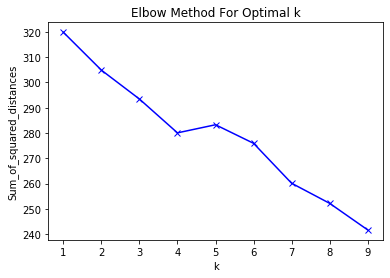

In [40]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Run k-means to cluster the neighborhood into 4 clusters.

In [41]:
# set number of clusters
kclusters = 4

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(denver_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 1, 2, 0, 0, 1, 0], dtype=int32)

In [42]:
df.head()

,Neighborhood,Average Rent,Latitude,Longitude
0,Athmar Park,1469.0,39.70396,-105.01039
1,Baker,2028.0,39.71117,-104.99209
2,Barnum,1010.0,39.71816,-105.03262
3,Barnum West,1784.0,39.71815,-105.04510
4,Bear Valley,1526.0,39.66172,-105.06561


Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [43]:
#nbd = pd.merge(df1, df2, on="Postal Code")
neighborhoods_venues_sorted.insert(1, 'Cluster Labels', kmeans.labels_)

In [44]:
denver_merged = pd.merge(neighborhoods_venues_sorted, df, on = 'Neighborhood')
denver_merged.head()

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Average Rent,Latitude,Longitude
0,Athmar Park,0,Scenic Lookout,Vacation Rental,Art Gallery,Park,Discount Store,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Women's Store,1469.0,39.70396,-105.01039
1,Baker,0,Bar,Chinese Restaurant,Dive Bar,Coffee Shop,Marijuana Dispensary,Breakfast Spot,Beach Bar,Mexican Restaurant,Shipping Store,Residential Building (Apartment / Condo),2028.0,39.71117,-104.99209
2,Barnum,0,Hookah Bar,Market,Convenience Store,Mobile Phone Shop,Dive Bar,Farmers Market,Farm,Exhibit,Event Space,Ethiopian Restaurant,1010.0,39.71816,-105.03262
3,Barnum West,0,Home Service,Brewery,Fast Food Restaurant,Construction & Landscaping,Electronics Store,Farmers Market,Farm,Exhibit,Event Space,Ethiopian Restaurant,1784.0,39.71815,-105.04510
4,Bear Valley,1,Park,Playground,Women's Store,Diner,Farmers Market,Farm,Exhibit,Event Space,Ethiopian Restaurant,Electronics Store,1526.0,39.66172,-105.06561


In [45]:
import matplotlib.cm as cm
import matplotlib.colors as colors

Finally, let's visualize the resulting clusters

In [46]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(denver_merged['Latitude'], denver_merged['Longitude'], denver_merged['Neighborhood'], denver_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=4,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## 5. Examine Clusters

In [47]:
Cluster0 = denver_merged[denver_merged['Cluster Labels']==0]
Cluster0

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Average Rent,Latitude,Longitude
0,Athmar Park,0,Scenic Lookout,Vacation Rental,Art Gallery,Park,Discount Store,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Women's Store,1469.0,39.703960,-105.010390
1,Baker,0,Bar,Chinese Restaurant,Dive Bar,Coffee Shop,Marijuana Dispensary,Breakfast Spot,Beach Bar,Mexican Restaurant,Shipping Store,Residential Building (Apartment / Condo),2028.0,39.711170,-104.992090
2,Barnum,0,Hookah Bar,Market,Convenience Store,Mobile Phone Shop,Dive Bar,Farmers Market,Farm,Exhibit,Event Space,Ethiopian Restaurant,1010.0,39.718160,-105.032620
3,Barnum West,0,Home Service,Brewery,Fast Food Restaurant,Construction & Landscaping,Electronics Store,Farmers Market,Farm,Exhibit,Event Space,Ethiopian Restaurant,1784.0,39.718150,-105.045100
6,Berkeley,0,Brewery,Pizza Place,Mexican Restaurant,Breakfast Spot,Coffee Shop,Italian Restaurant,Gym / Fitness Center,Taco Place,Bakery,Bar,1897.0,39.776660,-105.039570
7,Capitol Hill,0,Pizza Place,Sandwich Place,Convenience Store,Pub,Music Store,Bar,Bed & Breakfast,Bookstore,Breakfast Spot,Museum,1622.0,39.733700,-104.979570
9,Cheesman Park,0,Coffee Shop,Fish Market,American Restaurant,Noodle House,New American Restaurant,Soccer Field,Fishing Spot,Track,Playground,Grocery Store,2065.0,39.729110,-104.968170
10,Cherry Creek,0,Clothing Store,Cosmetics Shop,American Restaurant,Asian Restaurant,Coffee Shop,Furniture / Home Store,Optical Shop,Restaurant,Jewelry Store,Women's Store,2223.0,39.717820,-104.948730
11,City Park,0,Bar,Coffee Shop,Pizza Place,Park,Mexican Restaurant,Thai Restaurant,Convenience Store,Deli / Bodega,Music Venue,Dive Bar,2005.0,39.743790,-104.948250
12,City Park West,0,American Restaurant,Coffee Shop,Brewery,Mexican Restaurant,Thai Restaurant,Breakfast Spot,Pizza Place,Pharmacy,Sandwich Place,Café,1949.0,39.745450,-104.967200


In [78]:
Cluster0.describe()

,Cluster Labels,Average Rent,Latitude,Longitude
count,61.0,61.000000,61.000000,61.000000
mean,0.0,1731.721311,39.728858,-104.968481
std,0.0,308.882023,0.040010,0.066176
min,0.0,1010.000000,39.641540,-105.046490
25%,0.0,1473.000000,39.703810,-105.016040
50%,0.0,1841.000000,39.731660,-104.979570
75%,0.0,1949.000000,39.756340,-104.939990
max,0.0,2245.000000,39.853520,-104.673770


In [48]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Cluster0['Latitude'], Cluster0['Longitude'], Cluster0['Neighborhood'], Cluster0['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=4,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [ ]:
#list0 = Cluster0.iloc[:, 2:11].values.tolist()

In [49]:
Cluster1 = denver_merged[denver_merged['Cluster Labels']==1]
Cluster1

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Average Rent,Latitude,Longitude
4,Bear Valley,1,Park,Playground,Women's Store,Diner,Farmers Market,Farm,Exhibit,Event Space,Ethiopian Restaurant,Electronics Store,1526.0,39.661720,-105.065610
8,Chaffee Park,1,Park,Bus Stop,Women's Store,Discount Store,Fast Food Restaurant,Farmers Market,Farm,Exhibit,Event Space,Ethiopian Restaurant,1218.0,39.787410,-105.017560
28,Green Valley Ranch Denver,1,Restaurant,Golf Course,Park,Women's Store,Diner,Farm,Exhibit,Event Space,Ethiopian Restaurant,Electronics Store,1662.0,39.782540,-104.752540
30,Hampden,1,Construction & Landscaping,Park,Women's Store,Discount Store,Fast Food Restaurant,Farmers Market,Farm,Exhibit,Event Space,Ethiopian Restaurant,1321.0,39.660730,-104.885670
31,Hampden South,1,Park,Garden,Women's Store,Discount Store,Farmers Market,Farm,Exhibit,Event Space,Ethiopian Restaurant,Electronics Store,1590.0,39.645260,-104.895220
39,Lowry Field,1,Park,Coffee Shop,History Museum,Beer Garden,Construction & Landscaping,Skating Rink,Electronics Store,Donut Shop,Dry Cleaner,Eastern European Restaurant,1767.0,39.722510,-104.891540
60,Uptown Denver,1,Food,Construction & Landscaping,Park,Lawyer,Women's Store,Dive Bar,Farmers Market,Farm,Exhibit,Event Space,1622.0,39.788289,-104.836238
64,Washington Park,1,Park,Gym,Rock Climbing Spot,American Restaurant,Scenic Lookout,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Event Space,Diner,2045.0,39.702040,-104.965750


In [80]:
Cluster1.describe()

,Cluster Labels,Average Rent,Latitude,Longitude
count,8.0,8.000000,8.000000,8.000000
mean,1.0,1593.875000,39.718812,-104.913766
std,0.0,256.148081,0.060865,0.100117
min,1.0,1218.000000,39.645260,-105.065610
25%,1.0,1474.750000,39.661473,-104.978702
50%,1.0,1606.000000,39.712275,-104.893380
75%,1.0,1688.250000,39.783758,-104.873312
max,1.0,2045.000000,39.788289,-104.752540


In [50]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Cluster1['Latitude'], Cluster1['Longitude'], Cluster1['Neighborhood'], Cluster1['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=4,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [51]:
Cluster2 = denver_merged[denver_merged['Cluster Labels']==2]
Cluster2.head(5)

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Average Rent,Latitude,Longitude
5,Belcaro,2,Art Gallery,Women's Store,Discount Store,Fast Food Restaurant,Farmers Market,Farm,Exhibit,Event Space,Ethiopian Restaurant,Electronics Store,2205.0,39.70384,-104.94974
67,Wellshire Denver,2,Art Gallery,Women's Store,Discount Store,Fast Food Restaurant,Farmers Market,Farm,Exhibit,Event Space,Ethiopian Restaurant,Electronics Store,1902.0,39.66758,-104.95121


In [81]:
Cluster2.describe()

,Cluster Labels,Average Rent,Latitude,Longitude
count,2.0,2.000000,2.000000,2.000000
mean,2.0,2053.500000,39.685710,-104.950475
std,0.0,214.253355,0.025640,0.001039
min,2.0,1902.000000,39.667580,-104.951210
25%,2.0,1977.750000,39.676645,-104.950842
50%,2.0,2053.500000,39.685710,-104.950475
75%,2.0,2129.250000,39.694775,-104.950107
max,2.0,2205.000000,39.703840,-104.949740


In [52]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Cluster2['Latitude'], Cluster2['Longitude'], Cluster2['Neighborhood'], Cluster2['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=4,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [53]:
Cluster3 = denver_merged[denver_merged['Cluster Labels']==3]
Cluster3.head(5)

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Average Rent,Latitude,Longitude
33,Harvey Park South,3,Construction & Landscaping,Women's Store,Discount Store,Fast Food Restaurant,Farmers Market,Farm,Exhibit,Event Space,Ethiopian Restaurant,Electronics Store,1279.0,39.66250,-105.04227
50,Ruby Hill,3,Art Gallery,Construction & Landscaping,Trail,Women's Store,Electronics Store,Dog Run,Donut Shop,Dry Cleaner,Eastern European Restaurant,Ethiopian Restaurant,1469.0,39.69106,-105.00874


In [82]:
Cluster3.describe()

,Cluster Labels,Average Rent,Latitude,Longitude
count,2.0,2.000000,2.000000,2.000000
mean,3.0,1374.000000,39.676780,-105.025505
std,0.0,134.350288,0.020195,0.023709
min,3.0,1279.000000,39.662500,-105.042270
25%,3.0,1326.500000,39.669640,-105.033887
50%,3.0,1374.000000,39.676780,-105.025505
75%,3.0,1421.500000,39.683920,-105.017122
max,3.0,1469.000000,39.691060,-105.008740


In [56]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Cluster3['Latitude'], Cluster3['Longitude'], Cluster3['Neighborhood'], Cluster3['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=9,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=1).add_to(map_clusters)
       
map_clusters

In [ ]:
#Cluster4 = denver_merged[denver_merged['Cluster Labels']==4]
#Cluster4.head(10)

In [ ]:
#Cluster5 = denver_merged[denver_merged['Cluster Labels']==5]
#Cluster5.head(10)

In [ ]:
#Cluster6 = denver_merged[denver_merged['Cluster Labels']==6]
#Cluster6.head(10)

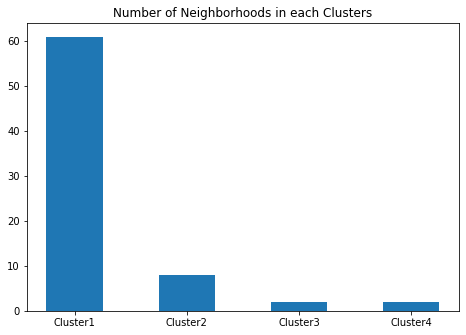

In [73]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Clusters = ['Cluster1', 'Cluster2', 'Cluster3', 'Cluster4']
Length = [len(Cluster0), len(Cluster1), len(Cluster2), len(Cluster3)]
ax.bar(Clusters, Length, width=0.5)
plt.title('Number of Neighborhoods in each Clusters')
plt.show()

In [61]:
print(len(Cluster0), len(Cluster1), len(Cluster2), len(Cluster3))

61 8 2 2


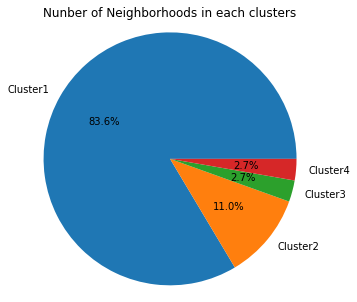

In [74]:
plt.figure(figsize=(5,5))
my_data = [len(Cluster0), len(Cluster1), len(Cluster2), len(Cluster3)]
my_labels = 'Cluster1', 'Cluster2', 'Cluster3', 'Cluster4'
plt.pie(my_data,labels=my_labels,autopct='%1.1f%%')
plt.title('Nunber of Neighborhoods in each clusters')
plt.axis('equal')
plt.show()

In [58]:
print(Cluster0['Average Rent'].mean())
print(Cluster1['Average Rent'].mean())
print(Cluster2['Average Rent'].mean())
print(Cluster3['Average Rent'].mean())
#print(Cluster4['Average Rent'].mean())
#print(Cluster5['Average Rent'].mean())

1731.72131147541
1593.875
2053.5
1374.0


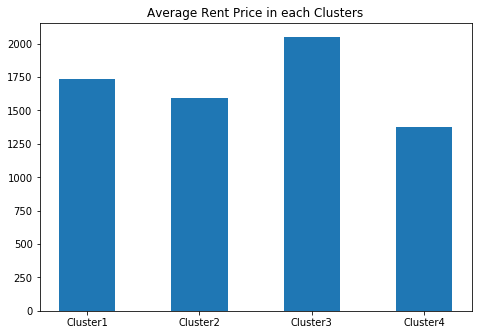

In [77]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
Clusters = ['Cluster1', 'Cluster2', 'Cluster3', 'Cluster4']
Average_Rent = [Cluster0['Average Rent'].mean(), Cluster1['Average Rent'].mean(), Cluster2['Average Rent'].mean(),
                Cluster3['Average Rent'].mean()]
ax.bar(Clusters, Average_Rent,width=0.5)
plt.title('Average Rent Price in each Clusters')
plt.show()